In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import ggplot
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

/home/vgudavar/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/vgudavar/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/vgudavar/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
df_train = pd.read_csv('../../data/train.tsv', sep='\t')
df_test = pd.read_csv('../../data/test.tsv', sep='\t')

In [17]:
df_train.head()
df_train = df_train[:10000]

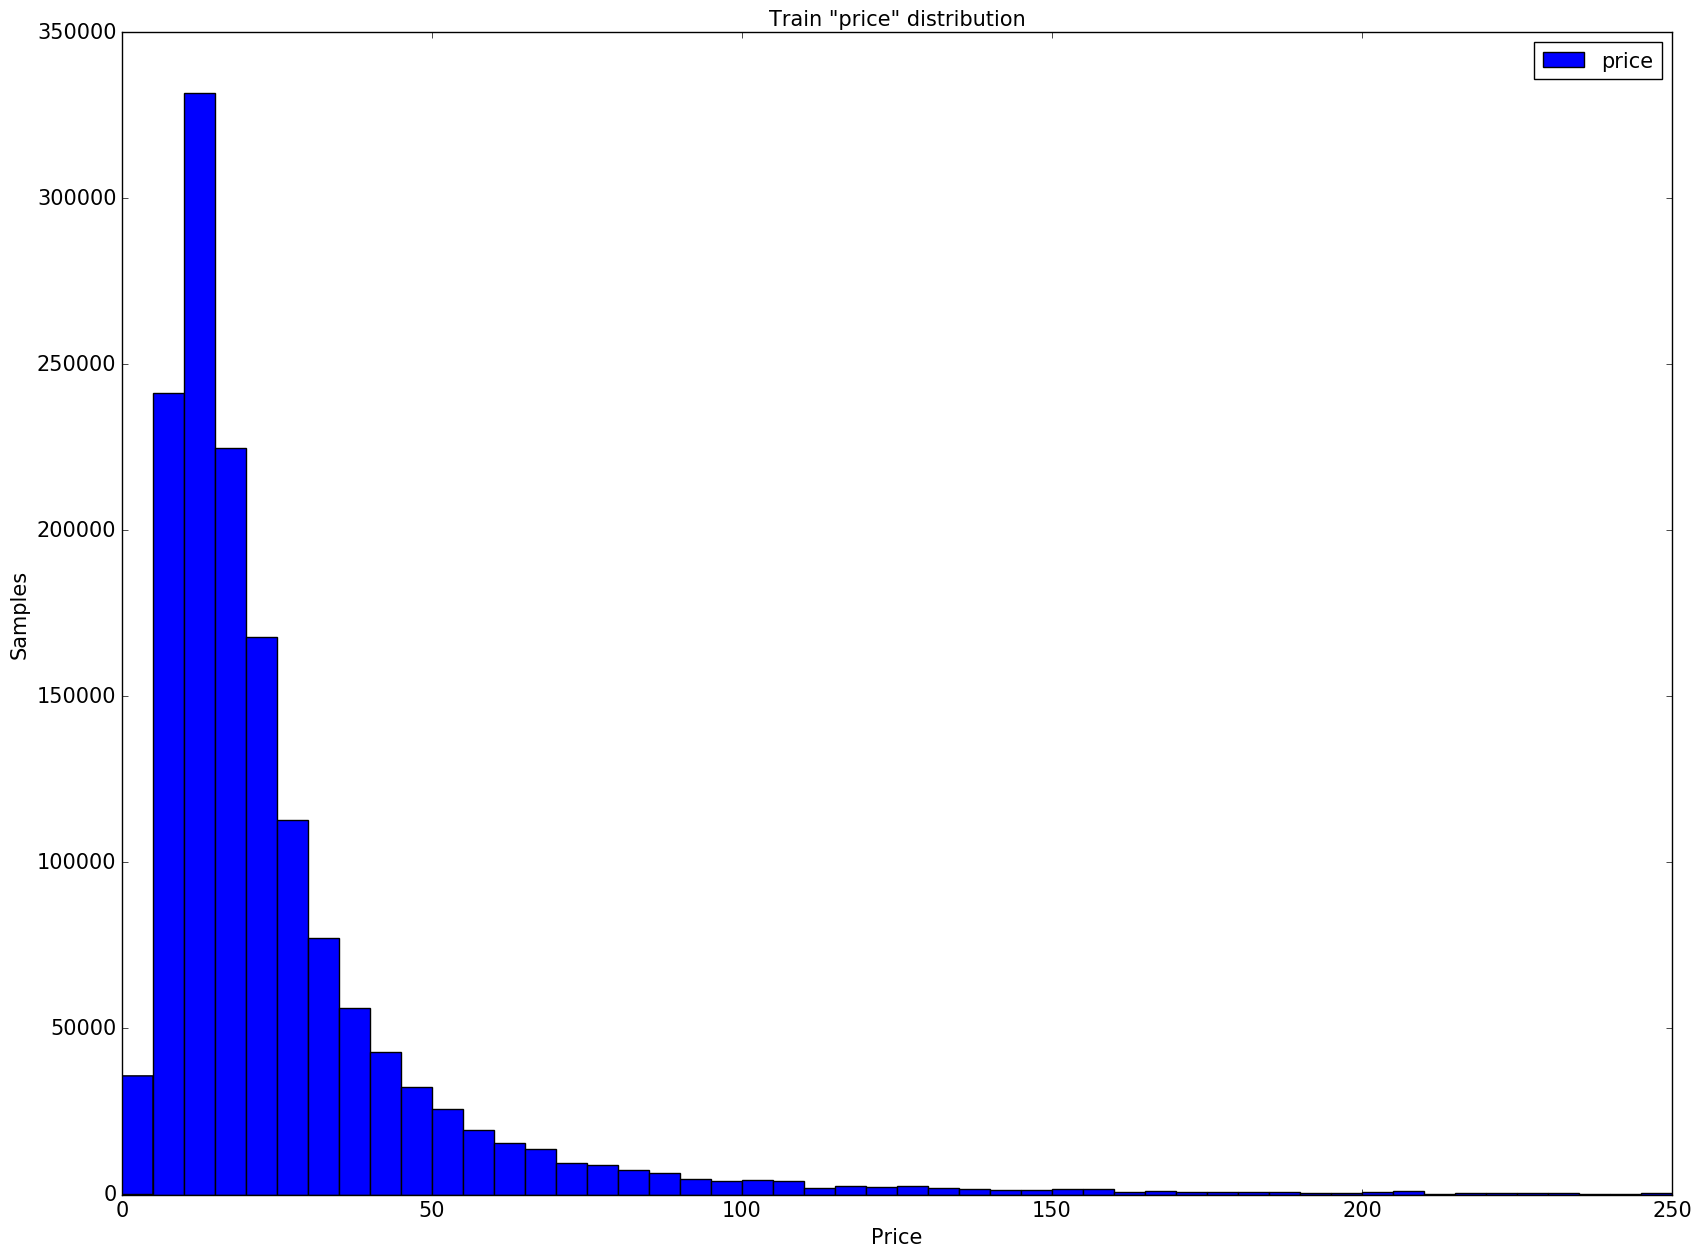

In [9]:
plt.figure(figsize=(20, 15))
plt.hist(df_train['price'], bins=50, range=[0,250], label='price')
plt.title('Train "price" distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

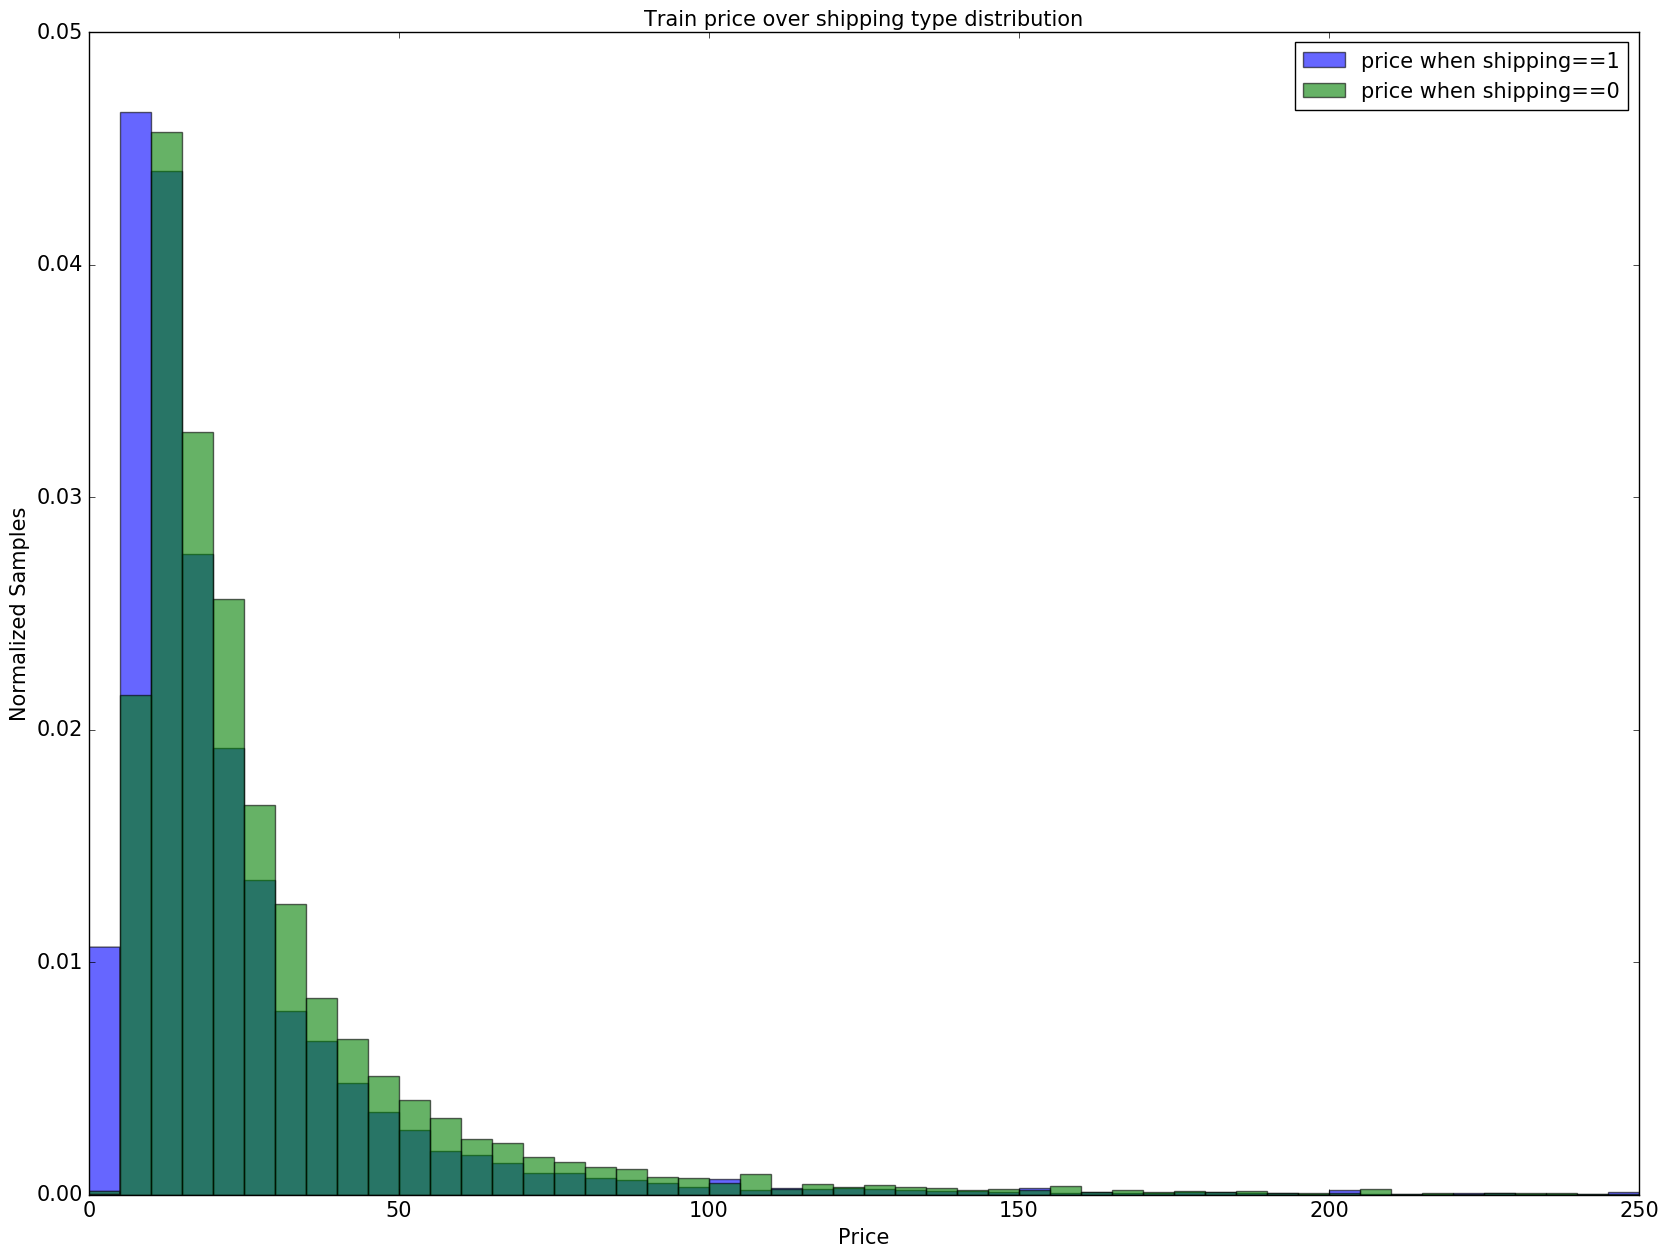

In [10]:
plt.figure(figsize=(20, 15))
bins=50
plt.hist(df_train[df_train['shipping']==1]['price'], bins, normed=True, range=[0,250],
         alpha=0.6, label='price when shipping==1')
plt.hist(df_train[df_train['shipping']==0]['price'], bins, normed=True, range=[0,250],
         alpha=0.6, label='price when shipping==0')
plt.title('Train price over shipping type distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Normalized Samples', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

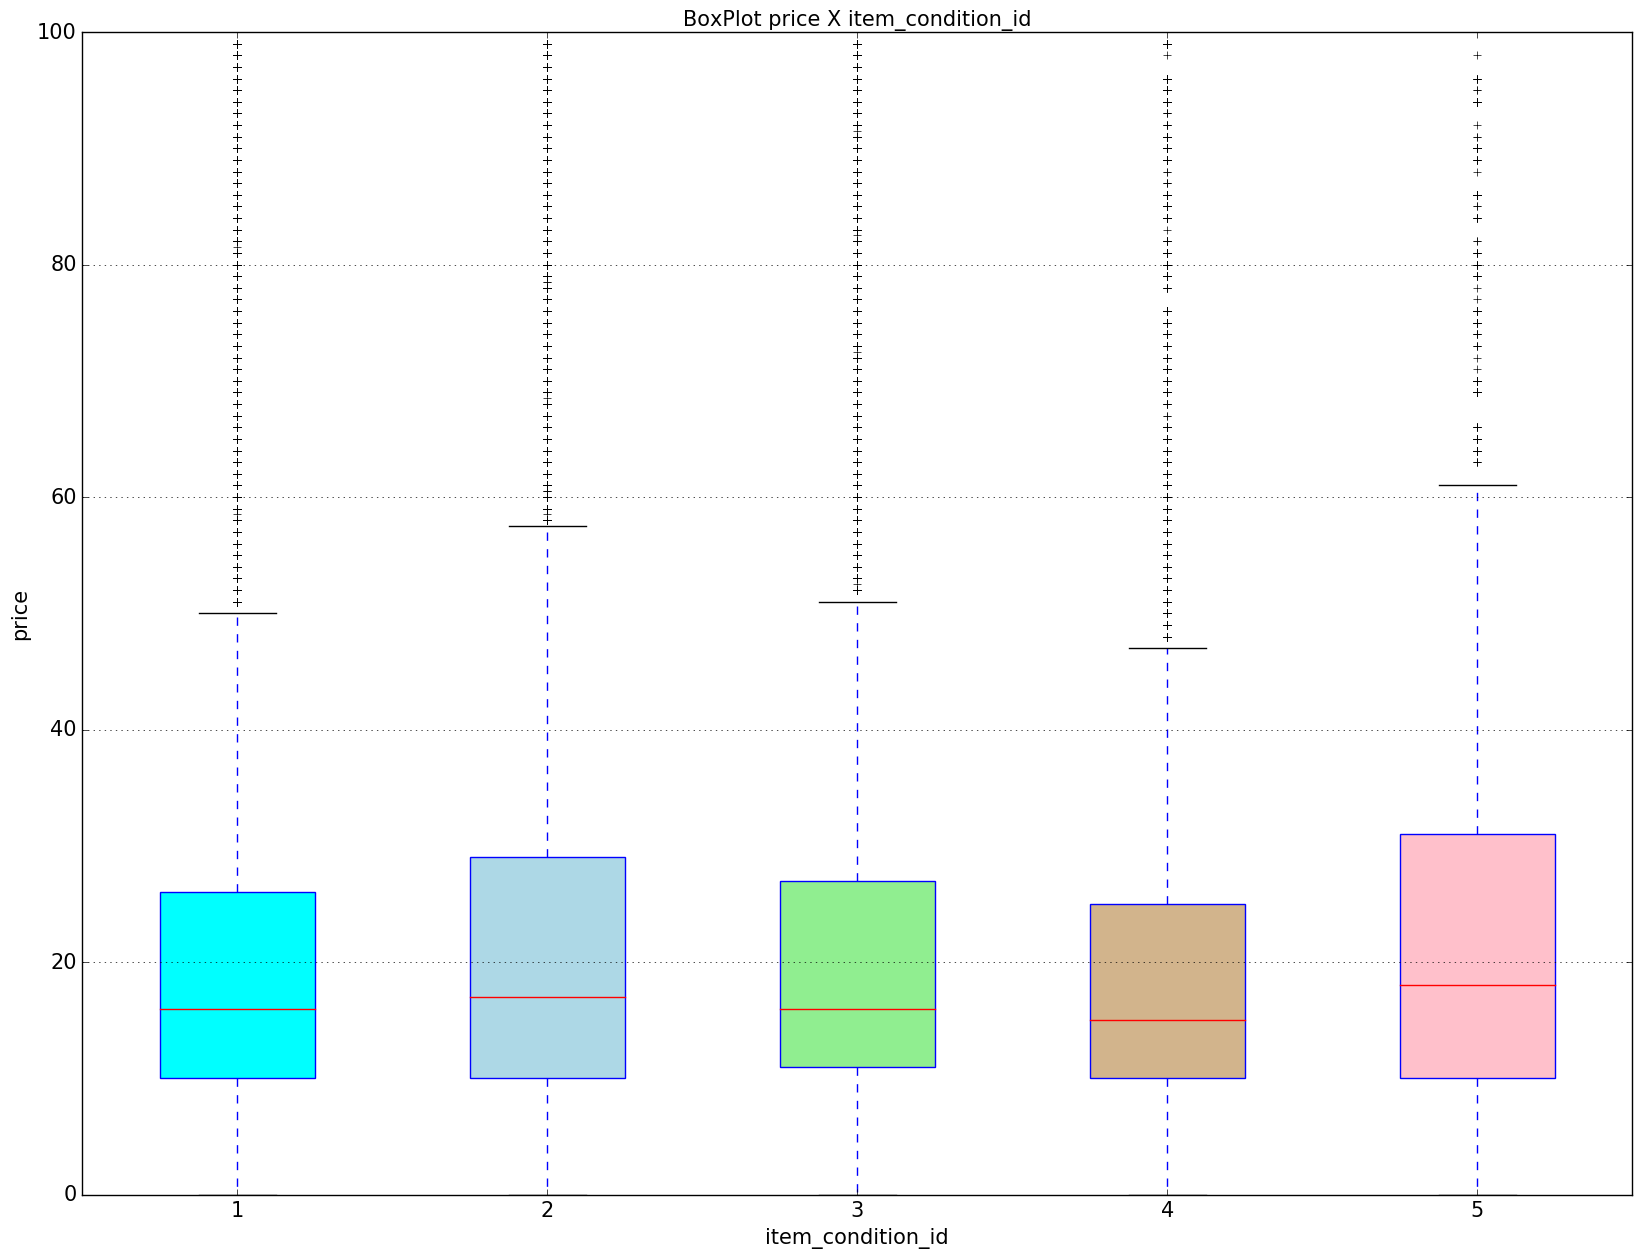

In [11]:
df = df_train[df_train['price']<100]

my_plot = []
for i in df_train['item_condition_id'].unique():
    my_plot.append(df[df['item_condition_id']==i]['price'])

fig, axes = plt.subplots(figsize=(20, 15))
bp = axes.boxplot(my_plot,vert=True,patch_artist=True,labels=range(1,6)) 

colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes.yaxis.grid(True)

plt.title('BoxPlot price X item_condition_id', fontsize=15)
plt.xlabel('item_condition_id', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

del df

(-0.5, 1439.5, 1079.5, -0.5)

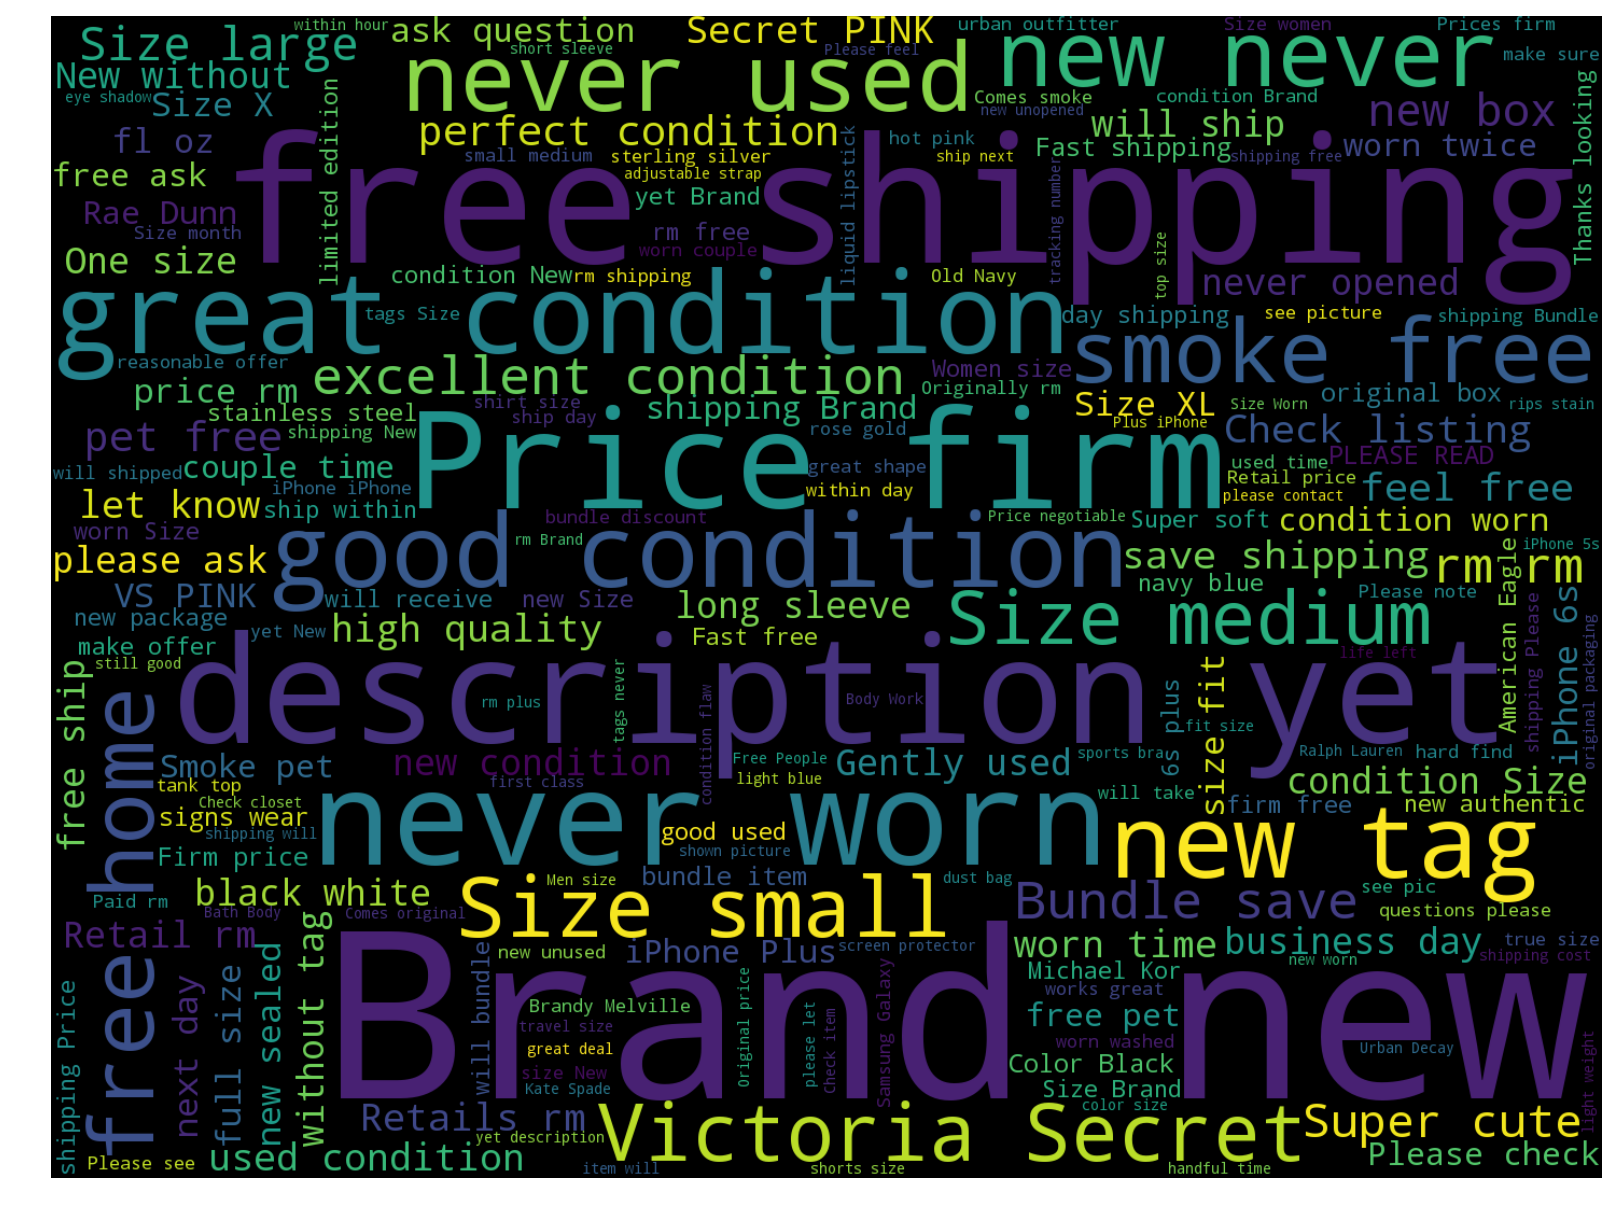

In [12]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(df_train['item_description']
.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

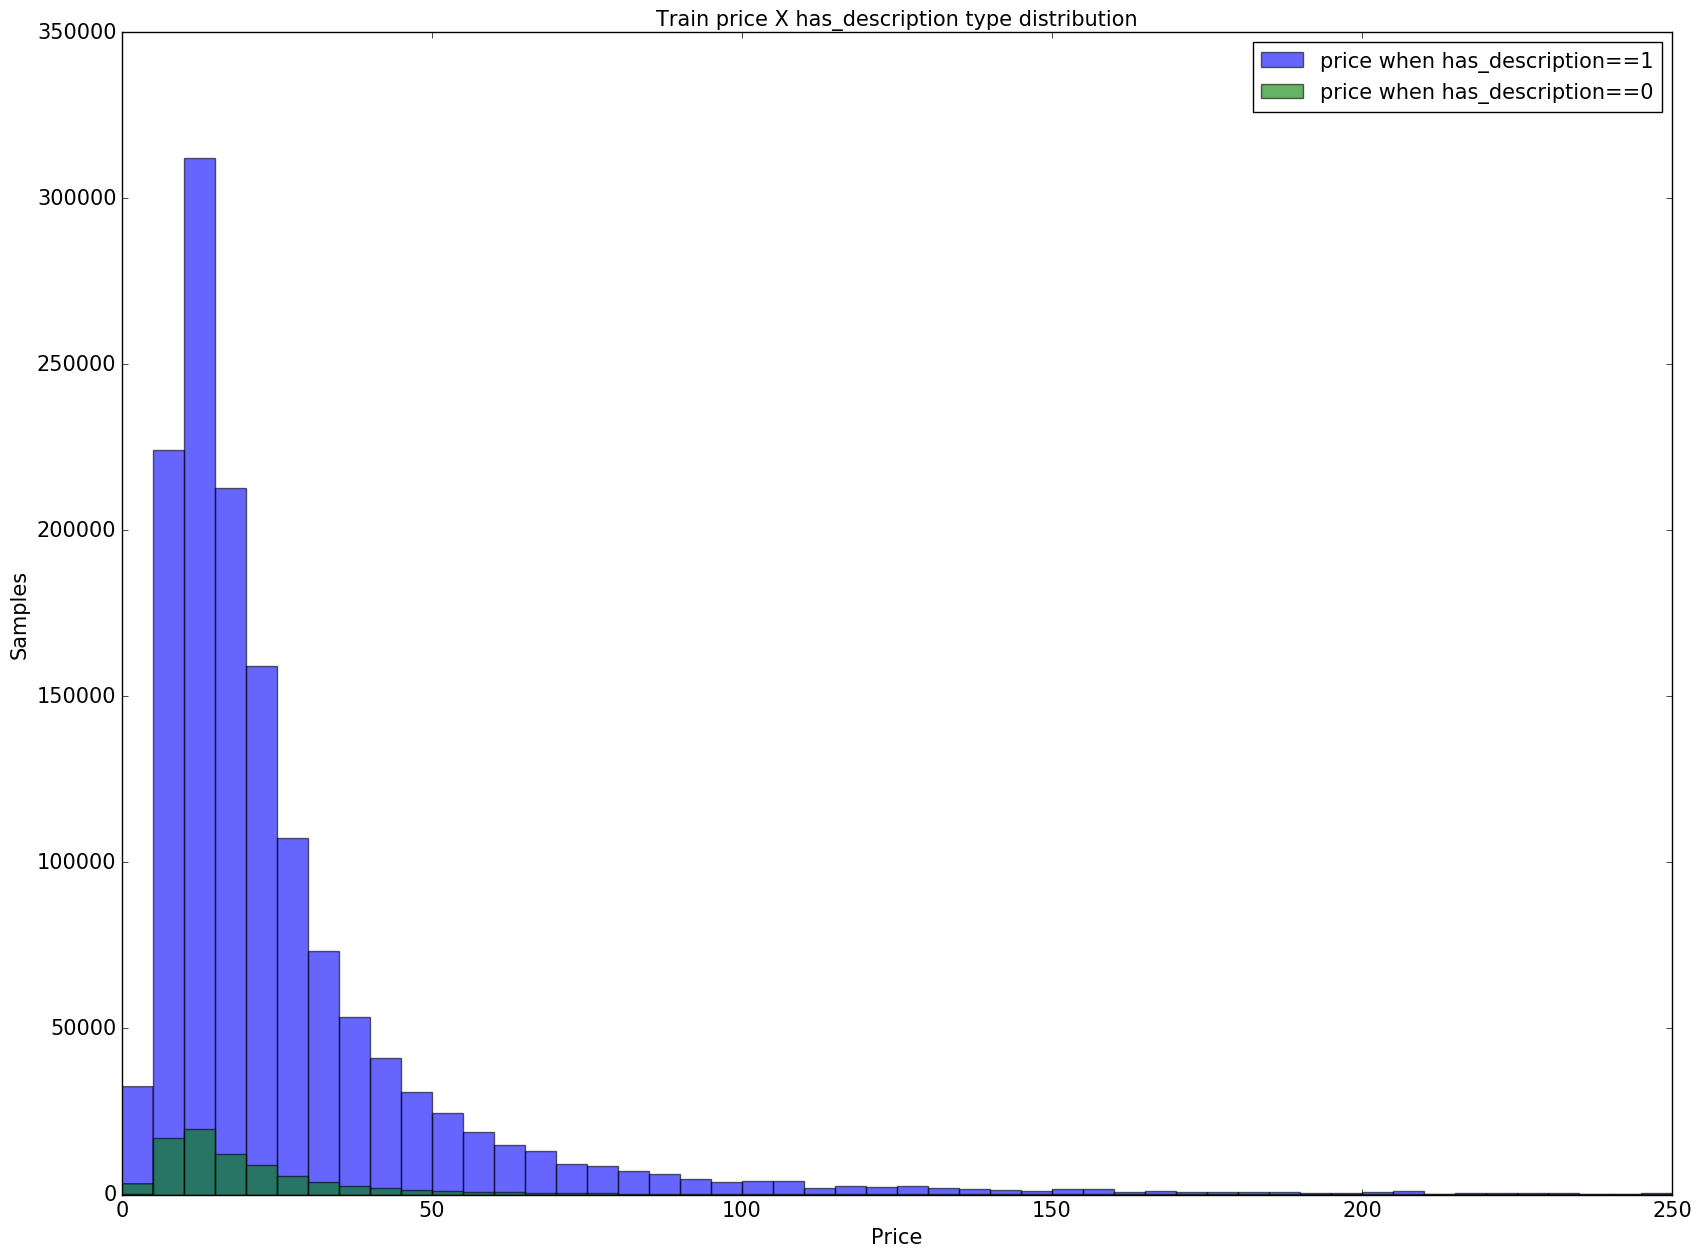

In [15]:
df_train['has_description'] = 1
df_train.loc[df_train['item_description']=='No description yet', 'has_description'] = 0




plt.figure(figsize=(20, 15))
bins=50
plt.hist(df_train[df_train['has_description']==1]['price'], bins, range=[0,250],
         alpha=0.6, label='price when has_description==1')
plt.hist(df_train[df_train['has_description']==0]['price'], bins, range=[0,250],
         alpha=0.6, label='price when has_description==0')
plt.title('Train price X has_description type distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

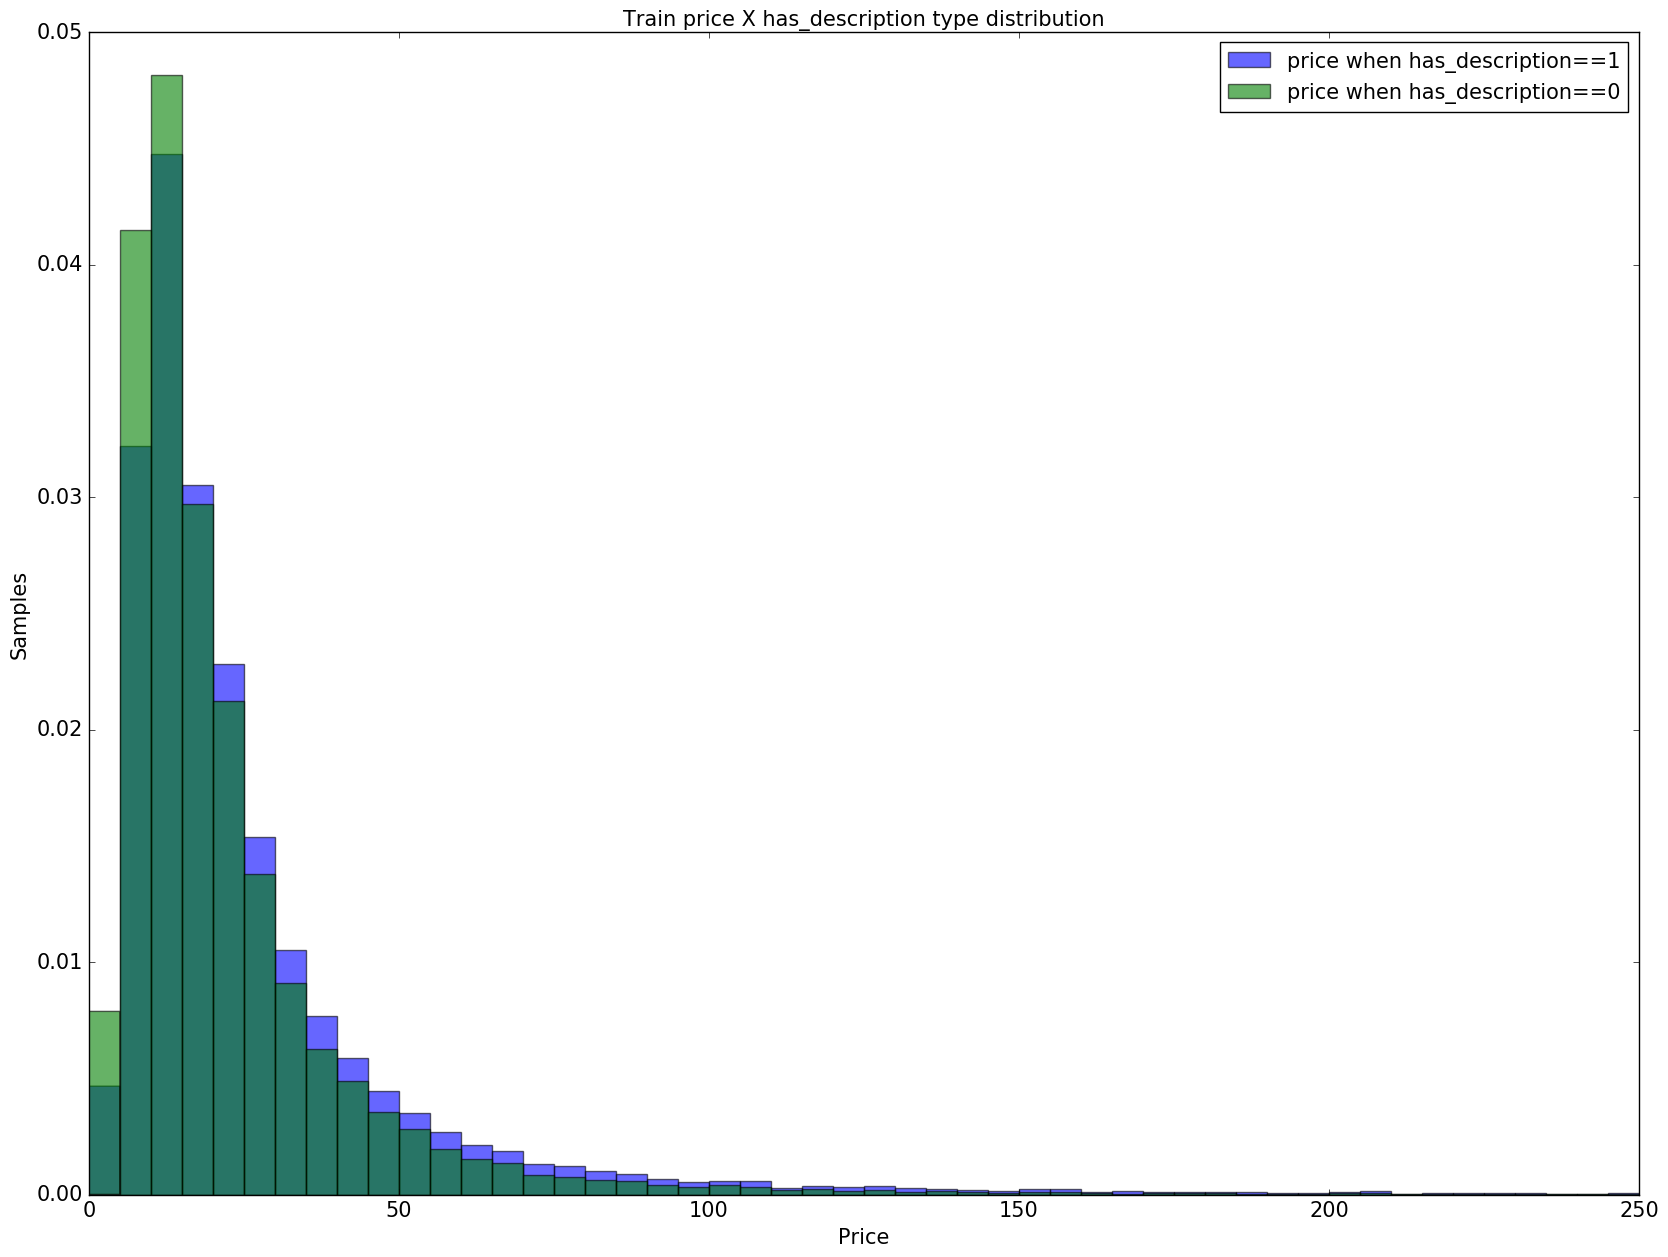

In [16]:
plt.figure(figsize=(20, 15))
bins=50
plt.hist(df_train[df_train['has_description']==1]['price'], bins, normed=True,range=[0,250],
         alpha=0.6, label='price when has_description==1')
plt.hist(df_train[df_train['has_description']==0]['price'], bins, normed=True,range=[0,250],
         alpha=0.6, label='price when has_description==0')
plt.title('Train price X has_description type distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [22]:
def compute_tfidf(description):
    description = str(description)
    description.translate(string.maketrans("",""),string.punctuation)
    

    tfidf_sum=0
    words_count=0
    for w in description.lower().split():
        words_count += 1
        if w in tfidf_dict:
            tfidf_sum += tfidf_dict[w]
    
    if words_count > 0:
        return tfidf_sum/words_count
    else:
        return 0

tfidf = TfidfVectorizer(
    min_df=5, strip_accents='unicode', lowercase =True,
    analyzer='word', token_pattern=r'\w+', ngram_range=(1, 3), use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words='english')

In [23]:
tfidf.fit_transform(df_train['item_description'].apply(str))
tfidf_dict = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
df_train['tfidf'] = df_train['item_description'].apply(compute_tfidf)

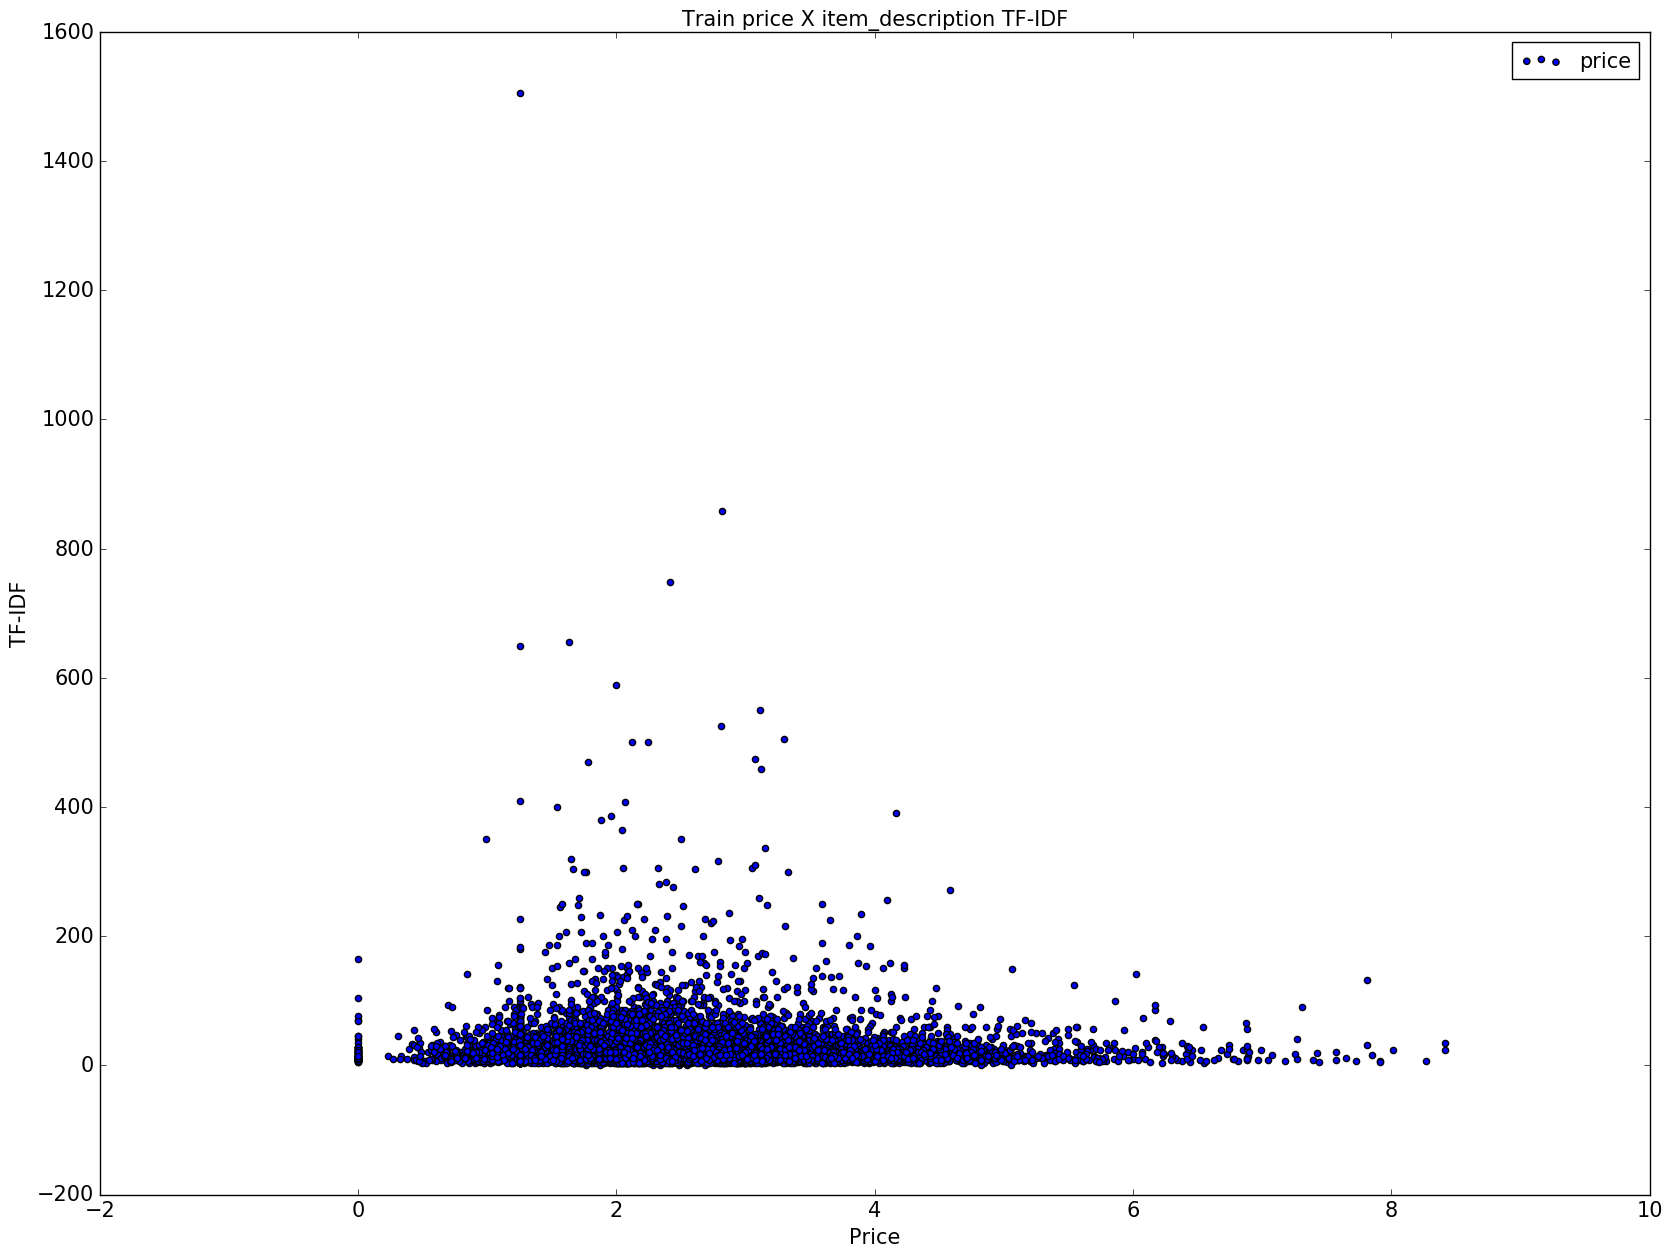

In [24]:
plt.figure(figsize=(20, 15))
plt.scatter(df_train['tfidf'], df_train['price'])
plt.title('Train price X item_description TF-IDF', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('TF-IDF', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()